In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import datetime as dt

seaborn.set_context('talk')


In [3]:
url= 'https://raw.githubusercontent.com/Natali-PP/diplodatos2021/main/mentoria/python_submissions.csv'
df = pd.read_csv(url)

In [4]:
df[:3]

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results
0,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
1,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\r\n return numero / 2,2019-09-04 01:29:22.351,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
2,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\r\n return 2 / numero\r\n,2019-09-04 02:53:01.099,failed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail..."


In [5]:
df.describe()

,exercise_eid,feedback,sid,student_uid,submissions_count
count,47183.000000,0.0,47183.000000,47183.000000,47183.000000
mean,8.589450,NaN,18412.829155,221.765000,6.763538
std,4.897098,NaN,13146.120096,74.852459,11.002089
min,1.000000,NaN,-1.000000,-1.000000,0.000000
25%,4.000000,NaN,6287.500000,161.000000,0.000000
50%,8.000000,NaN,18092.000000,223.000000,3.000000
75%,13.000000,NaN,29895.500000,284.000000,8.000000
max,19.000000,NaN,41700.000000,363.000000,144.000000


# Caracterización
Estas son algunas preguntas que pueden ayudarnos a entrar al lote de datos y caracterizarlo:

¿Qué tamaño tiene?
¿Qué valores únicos hay en cada columna?
¿Durante qué período se enviaron las soluciones? ¿En qué dias de la semana?
¿Cómo son las soluciones? ¿Cuántas soluciones únicas hay?
¿Cuántos ejercicios únicos tenemos?

In [6]:
#¿Qué tamaño tiene? 
df.shape

(47183, 13)

In [7]:
#¿Qué valores únicos hay en cada columna? 

In [8]:
len(df['exercise_eid'].value_counts())

19

In [9]:
df['exercise_eid'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 10], dtype=int64)

In [10]:
len(df['exercise_name'].value_counts())

46

In [11]:
#df['exercise_name'].value_counts()

In [12]:
len(df['expectation_results'].value_counts())

337

In [13]:
len(df['feedback'].value_counts())

0

In [14]:
len(df['guide_slug'].value_counts())

3

In [15]:
len(df['result'].value_counts())

9181

In [16]:
len(df['sid'].value_counts())

41676

In [17]:
len(df['student_uid'].value_counts())

286

In [18]:
len(df['submission_created_at'].value_counts())

47175

In [19]:
len(df['submission_content'].value_counts())

32937

In [20]:
#df['submission_content'].unique()

In [21]:
len(df['submission_status'].value_counts())

6

In [22]:
len(df['submissions_count'].value_counts())

145

In [23]:
len(df['test_results'].value_counts())

2780

In [24]:
print(f"El período que se enviaron las soluciones es desde: {df['submission_created_at'].min()}  hasta: {df['submission_created_at'].max()}")

El período que se enviaron las soluciones es desde: 2019-08-30 13:17:17.700  hasta: 2020-11-23 21:52:17.944


In [25]:
#temp = pd.Timestamp('submission_created_at')
#temp.day_name()

In [26]:
pd.to_datetime(df.submission_created_at)#.strftime("%Y-%m-%d")

0       2019-08-30 13:17:17.700
1       2019-09-04 01:29:22.351
2       2019-09-04 02:53:01.099
3       2019-09-04 02:53:24.673
4       2019-09-04 02:53:41.949
                  ...          
47178   2020-11-08 22:03:56.946
47179   2020-11-12 11:10:08.054
47180   2020-11-12 13:56:29.344
47181   2020-11-16 18:22:54.768
47182   2020-11-23 21:46:55.629
Name: submission_created_at, Length: 47183, dtype: datetime64[ns]

In [44]:
df['date']= pd.to_datetime(df['submission_created_at']).dt.date
df['date'].value_counts()#[:10].index

#pd.to_datetime(df['submission_created_at']).dt.date

2020-05-26    2383
2020-05-15    2294
2020-09-08    2236
2020-09-14    2141
2019-09-26    1826
              ... 
2020-11-14       1
2020-11-17       1
2020-11-01       1
2020-06-12       1
2020-08-07       1
Name: date, Length: 198, dtype: int64

In [45]:
#df.groupby(df['submission_created_at_date']dt.to_period("M")).agg('count')

In [73]:
df.groupby(df['student_uid']).agg('count')

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,submission_content,submission_created_at,submission_status,submissions_count,test_results,date,time,Month,Year,status
student_uid,,,,,,,,,,,,,,,,,
-1,72,72,72,0,72,3,72,57,72,72,72,58,72,72,72,72,72
75,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1
76,89,89,89,0,89,6,89,71,89,89,89,71,89,89,89,89,89
77,186,186,186,0,186,29,186,129,186,186,186,129,186,186,186,186,186
78,84,84,84,0,84,53,84,73,84,84,84,73,84,84,84,84,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,6,6,6,0,6,0,6,6,6,6,6,6,6,6,6,6,6
359,38,38,38,0,38,14,38,31,38,38,38,31,38,38,38,38,38
361,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1


In [46]:
df['time']= pd.to_datetime(df['submission_created_at']).dt.time
df['time'].value_counts()#[:10].index

05:04:11.989000    2
13:04:52.356000    2
03:54:32.224000    2
12:20:40.639000    2
19:17:32.172000    2
                  ..
15:33:38.475000    1
15:16:22.855000    1
14:47:35.663000    1
06:20:15.583000    1
12:17:37.768000    1
Name: time, Length: 47163, dtype: int64

In [47]:
df['Month'] = pd.DatetimeIndex(df['submission_created_at']).month
df['Year'] = pd.DatetimeIndex(df['submission_created_at']).year

In [48]:
df.groupby(['Year','Month']).agg({'exercise_name':'count','student_uid':'unique'})

exercise_name                                        student_uid
Year Month                                                                  
2019 8                  2                                               [76]
     9               4746  [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 8...
     10              2263  [91, 98, 130, 131, 132, 133, 134, 135, 136, 13...
     11               580  [87, 144, 145, 103, 117, 91, 119, 126, 90, 120...
     12                23                                              [146]
2020 5              15732  [147, 148, 149, 150, 151, 152, 153, 154, 155, ...
     6               3507  [236, 241, 242, 243, 244, 166, 189, 212, 220, ...
     7               1126  [245, 246, 247, 248, 249, 250, -1, 189, 193, 1...
     8                494                           [251, 252, 253, 75, 355]
     9              15305  [254, 255, 256, 257, 258, 259, 260, 261, 262, ...
     10              2791  [273, 346, 347, 348, 349, 350, 256, 332, 315, ...
     11               614  [351, 352, 353, 319, 330, 311, 347, 342, 345, ...

In [49]:
df_ejemp=df.groupby(['Year','Month']).size()

In [50]:
df_ejemp.head(15)

Year  Month
2019  8            2
      9         4746
      10        2263
      11         580
      12          23
2020  5        15732
      6         3507
      7         1126
      8          494
      9        15305
      10        2791
      11         614
dtype: int64

In [56]:
matplotlib.pyplot.figure(figsize = [20, 5] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
ax = seaborn.barplot(y=df.groupby(['Year','Month']).size(), x=df.groupby(['Year','Month']).size().index, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

NotImplementedError: isna is not defined for MultiIndex

<Figure size 1440x360 with 0 Axes>

In [59]:
matplotlib.pyplot.figure(figsize = [20, 5] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
seaborn.histplot(data=df_ejemp, x=df_ejemp['Month'])

KeyError: 'Month'

<Figure size 1440x360 with 0 Axes>

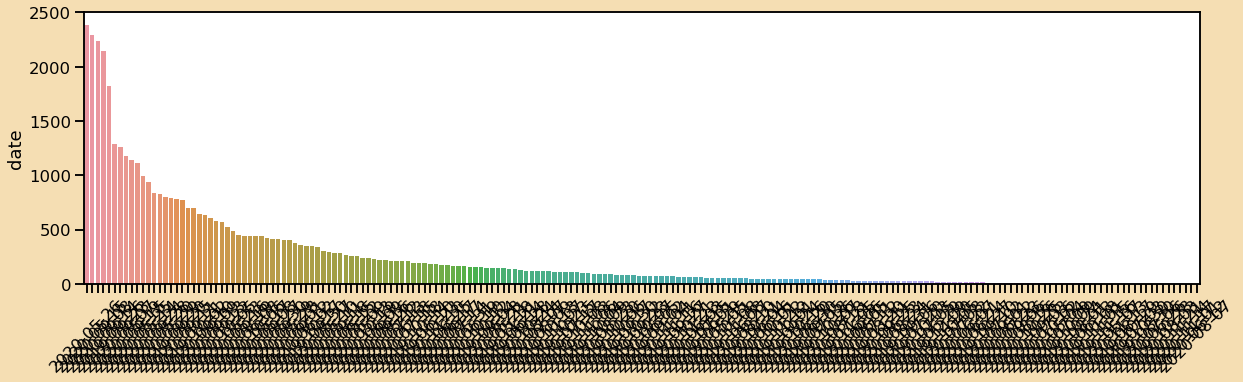

In [60]:
matplotlib.pyplot.figure(figsize = [20, 5] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
ax = seaborn.barplot(y=df['date'].value_counts(), x=df['date'].value_counts().index, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [62]:
df['date'].value_counts()

2020-05-26    2383
2020-05-15    2294
2020-09-08    2236
2020-09-14    2141
2019-09-26    1826
              ... 
2020-11-14       1
2020-11-17       1
2020-11-01       1
2020-06-12       1
2020-08-07       1
Name: date, Length: 198, dtype: int64

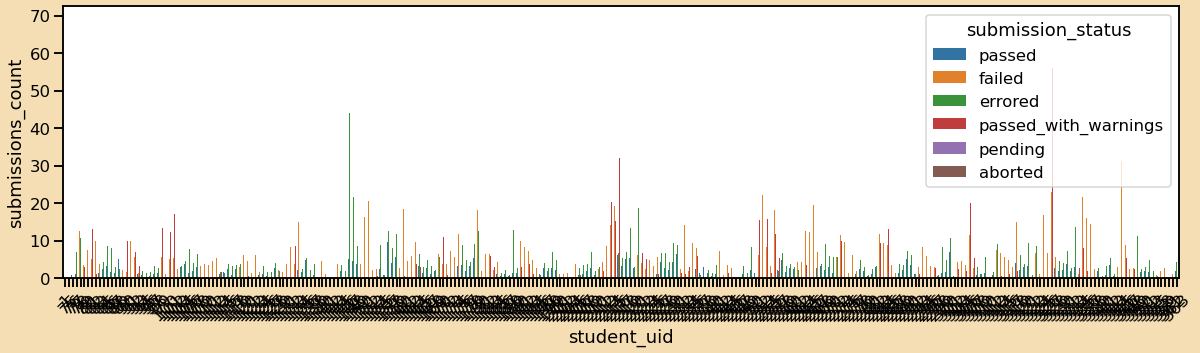

In [63]:
matplotlib.pyplot.figure(figsize = [20, 5] , dpi = None , facecolor = "wheat" , edgecolor = None , frameon = True  , clear = False )
ax = seaborn.barplot(y=df['submissions_count'], x=df['student_uid'], data=df, hue="submission_status", ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [64]:
df.groupby('submission_status').size()

submission_status
aborted                     3
errored                 15604
failed                  17609
passed                  13519
passed_with_warnings      439
pending                     9
dtype: int64

In [71]:
df.groupby(['guide_slug','exercise_eid','exercise_name','status']).agg({'date':'max','student_uid':'count'})

date  \
guide_slug                                         exercise_eid exercise_name               status                
mumukiproject/mumuki-guia-python-funciones-tipo... 1            Funciones, declaración      no_paso  2020-11-10   
                                                                                            paso     2020-11-23   
                                                   2            Funciones, uso              no_paso  2020-11-21   
                                                                                            paso     2020-11-23   
                                                   3            Los premios                 no_paso  2020-11-23   
...                                                                                                         ...   
mumukiproject/mumuki-guia-python-variables-y-pr... 13           PIenso que así es más fácil paso     2019-11-21   
                                                                Pienso que así es más fácil no_paso  2020-11-16   
                                                                                            paso     2020-11-23   
                                                                                            pending  2020-06-23   
                                                   14           Esto no tiene valor         paso     2020-11-23   

                                                                                                     student_uid  
guide_slug                                         exercise_eid exercise_name               status                
mumukiproject/mumuki-guia-python-funciones-tipo... 1            Funciones, declaración      no_paso          769  
                                                                                            paso             300  
                                                   2            Funciones, uso              no_paso          943  
                                                                                            paso             278  
                                                   3            Los premios                 no_paso         1120  
...                                                                                                          ...  
mumukiproject/mumuki-guia-python-variables-y-pr... 13           PIenso que así es más fácil paso              29  
                                                                Pienso que así es más fácil no_paso          138  
                                                                                            paso             165  
                                                                                            pending            1  
                                                   14           Esto no tiene valor         paso             378  

[97 rows x 2 columns]

In [68]:
df.groupby(['guide_slug','exercise_eid','exercise_name']).agg({'date':'max','student_uid':'count'})

date  \
guide_slug                                         exercise_eid exercise_name                             
mumukiproject/mumuki-guia-python-funciones-tipo... 1            Funciones, declaración       2020-11-23   
                                                   2            Funciones, uso               2020-11-23   
                                                   3            Los premios                  2020-11-23   
                                                   4            Libros de la buena memoria   2020-11-23   
                                                                ¿Es par?                     2019-12-09   
                                                   5            Tipos de datos               2020-11-23   
                                                   6            Booleanos                    2020-11-23   
                                                   7            El retorno del booleano      2020-11-23   
                                                                Más booleanos                2019-11-21   
                                                   8            Haciendo cuentas             2020-11-23   
                                                   9            Calefones                    2019-09-23   
                                                   11           ¿Y qué tal si...?            2020-11-23   
                                                   12           ¿De qué signo sos?           2020-11-23   
                                                   13           Palabras, sólo palabras      2020-11-23   
                                                   14           Operando strings             2020-11-23   
                                                   15           ¡GRITAR!                     2020-11-23   
                                                   16           Probando funciones           2020-11-23   
                                                   17           Poniendo topes               2020-11-23   
                                                   18           No tan distintos             2020-11-23   
                                                   19           Datos de todo tipo           2020-11-23   
mumukiproject/mumuki-guia-python-practica-funci... 1            Comprando Hardware           2020-11-23   
                                                   2            ¿Me conviene?                2020-11-23   
                                                   3            Triangulos                   2020-11-23   
                                                   4            Cuadrados                    2020-11-23   
                                                   5            ¿Está afinado?               2020-11-23   
                                                   6            Cartelitos                   2020-11-23   
                                                   7            Más Cartelitos               2020-11-23   
                                                   8            Cartelitos óptimos           2020-11-23   
                                                   9            Cara o ceca                  2020-11-23   
                                                   10           ¡Envido!                     2020-11-23   
                                                   11           ¡Quiero retruco!             2020-11-23   
                                                   12           ¡Quiero vale cuatro!         2020-11-23   
                                                   13           ¿Está cerca?                 2020-11-23   
mumukiproject/mumuki-guia-python-variables-y-pr... 1            ¿Y el program?               2020-11-23   
                                                   2            El círculo de la vida        2020-11-23   
                                                   3            Volviéndonos ricos           2020-11-23   
                                 

 - secuencia didácitca
    - resolvio siguiendo secuencia?
    - que secuencia es la mas frecuente? 
    - bonus: como pensar las secuencias mas alla del orden rigidio de envios?
- frecuencia de accion
  - numero de dias por persona
  - numero de sesiones por persona

- bonus: dificultad
   - numeros intentos
   - tiempo neto 
- perfil de ejercicios y personas
   - intentos fallidos: es cierto que las personas con mas intentos rojos tienen menor avance?     
   - tiempo entre ejercicios: 
      - es cierto que a todas las personas les toma el mismo aproximante tiempo pasar de un ejercicio a otro?
      - es cierto que toma aproximadamente el mismo tiempo pasar de un ejercicio cualquiera a otro? 
   - todos los ejercicios tienen la misma cantidad de failed?
   - más ejercicios con status failed

In [69]:
df["status"] = df["submission_status"].replace({"failed": "no_paso", "passed": "paso", "errored": "no_paso", "passed_with_warnings": "no_paso",})

In [78]:
filter=(df['exercise_name']=="Y esto cuánto vale?") &(df['submission_status']=="passed")

In [ ]:
[ {"index":ind, "name":elem['name']} for ind,elem in enumerate(available_data['exercises'])]

In [ ]:
df["submission_status"] = df["submission_status"].replace({"failed": "no_paso", "passed": "paso", "errored": "no_paso", "passed_with_warnings": "no_paso", 
                          })

In [ ]:
def set_leccion_realizada(exercise_name):
    if exercise_name == ('Datos de todo tipo'):
        return 'Completo la leccion Uno'
    if exercise_name == ('¡Quiero vale cuatro!'):
        return 'Completo la leccion Dos'
    if exercise_name == ('¿Y esto cuánto vale?'):
        return 'Completo la leccion Tres'

In [ ]:
filtered_values.loc[:, 'profile_category'] = filtered_values.exercise_name\
    .apply(set_leccion_realizada)
filtered_values[:20]